Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

EDA: Exploratory Data Analysis

In [2]:
data=pd.read_csv('Fraud.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [4]:
print(data.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

In [5]:
#checking for null values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


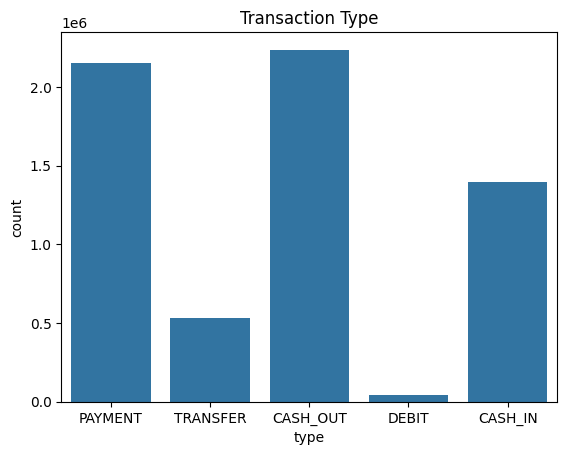

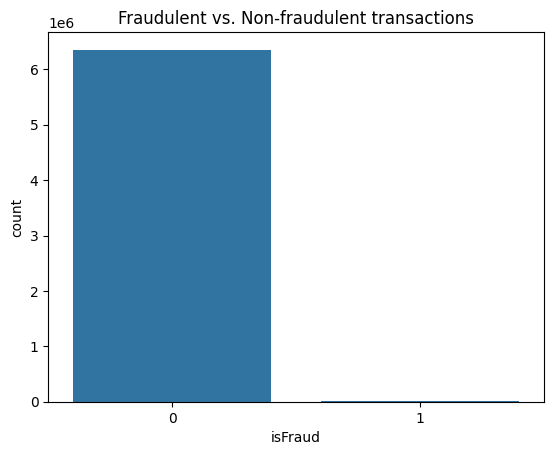

In [7]:
# type:transaction type
#isFraud: no of fraud transactions. and non-fraud transations

sns.countplot(x='type',data=data)
plt.title('Transaction Type')
plt.show()

sns.countplot(x='isFraud',data=data)
plt.title('Fraudulent vs. Non-fraudulent transactions')
plt.show()

In [8]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

Data Preprocessing

In [9]:
#One-hot encoder
#type into categorical data

#1. one-hot encoder to 'type'
type_dummies=pd.get_dummies(data['type'],prefix='True')

#2. concatenate new dataframe to the original
data=pd.concat([data,type_dummies],axis=1)

#3. drop the original col 'type'
data=data.drop('type',axis=1)

In [10]:
# defining feature X and target y
X=data.drop(['isFraud','nameOrig','nameDest'],axis=1)
y=data['isFraud']

In [11]:
X.dtypes

step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud      int64
True_CASH_IN         bool
True_CASH_OUT        bool
True_DEBIT           bool
True_PAYMENT         bool
True_TRANSFER        bool
dtype: object

In [12]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Model Training

In [13]:
#Sample a smaller subset of the resampled data
X_resampled, y_resampled = X_resampled.sample(frac=0.1, random_state=42), y_resampled.sample(frac=0.1, random_state=42)

In [14]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2, random_state=42)

In [15]:
#scale features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
# logistic reg
log_reg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [17]:
y_pred=log_reg.predict(X_test)

In [19]:
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9635


In [20]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[121590   5591]
 [  3677 123319]]


In [22]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96    127181
           1       0.96      0.97      0.96    126996

    accuracy                           0.96    254177
   macro avg       0.96      0.96      0.96    254177
weighted avg       0.96      0.96      0.96    254177



Fine-Tuning

In [23]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

In [24]:
# Set up GridSearchCV with verbosity
grid_search = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=3)

In [26]:
# Fit the model
grid_search.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=3)

In [27]:
# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [31]:
best_model = grid_search.best_estimator_

Making Prediction using Best Model

In [33]:
y_pred_best = best_model.predict(X_resampled)

In [35]:
print("Confusion Matrix:\n", confusion_matrix(y_resampled, y_pred_best))

Confusion Matrix:
 [[475935 159659]
 [ 13649 621638]]


In [37]:
print("Classification Report:\n", classification_report(y_resampled, y_pred_best))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.75      0.85    635594
           1       0.80      0.98      0.88    635287

    accuracy                           0.86   1270881
   macro avg       0.88      0.86      0.86   1270881
weighted avg       0.88      0.86      0.86   1270881



In [38]:
accuracy=accuracy_score(y_resampled,y_pred_best)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8636
